In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:

##Importing libraries
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

### Read Data with Memory optimization

Used merged data for visualisation

In [0]:
def reduce_mem_usage():

    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    
    df=pd.read_csv('/content/drive/My Drive/phd/train_merged.csv',na_values=["NA","?",",",""])
    print("Data Type of columns in the data frame before optimization")
    print(df.dtypes)
    print()

    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of the data frame before optimization is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of the data frame after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    print()
    
    print("Data type of columns in the data frame after optimization")
    print(df.dtypes)
    print()

    return df

#Optimi
train_data=reduce_mem_usage()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Data Type of columns in the data frame before optimization
date                 object
locationId            int64
item_id               int64
unit_sales          float64
onpromotion          object
class                 int64
category_of_item     object
perishable            int64
city                 object
state                object
cluster               int64
type                 object
transactions        float64
dtype: object

Memory usage of the data frame before optimization is 10104.89 MB
Memory usage of the data frame after optimization is: 2137.63 MB
Decreased by 78.8%

Data type of columns in the data frame after optimization
date                category
locationId              int8
item_id                int32
unit_sales           float32
onpromotion         category
class                  int16
category_of_item    category
perishable              int8
city                category
state               category
cluster                 int8
type                category
trans

In [0]:
train_data.to_pickle("train_data_optimize.pkl")

EDA

In [0]:
train_data.head()

,date,locationId,item_id,unit_sales,onpromotion,class,category_of_item,perishable,city,state,cluster,type,transactions
0,2015-12-16,39,1105215,6.0,NaN,1074,gro_itm,0,Hyd,TG,6,B,1655.0
1,2015-12-16,39,1114749,2.0,NaN,3040,cln_utl,0,Hyd,TG,6,B,1655.0
2,2015-12-16,39,1121616,2.0,NaN,2644,del_itm,1,Hyd,TG,6,B,1655.0
3,2015-12-16,39,1137146,3.0,NaN,1074,gro_itm,0,Hyd,TG,6,B,1655.0
4,2015-12-16,39,1146799,1.0,NaN,1040,gro_itm,0,Hyd,TG,6,B,1655.0


In [0]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101882209 entries, 0 to 101882208
Data columns (total 13 columns):
date                category
locationId          int8
item_id             int32
unit_sales          float32
onpromotion         category
class               int16
category_of_item    category
perishable          int8
city                category
state               category
cluster             int8
type                category
transactions        float16
dtypes: category(6), float16(1), float32(1), int16(1), int32(1), int8(3)
memory usage: 2.1 GB


In [0]:
train_data.describe(include='all')

,date,locationId,item_id,unit_sales,onpromotion,class,category_of_item,perishable,city,state,cluster,type,transactions
count,101882209,1.018822e+08,1.018822e+08,1.018822e+08,80224558,1.018822e+08,101882209,1.018822e+08,101882209,101882209,1.018822e+08,101882209,101667584.0
unique,1456,NaN,NaN,NaN,2,NaN,30,NaN,22,12,NaN,5,NaN
top,2018-02-28,NaN,NaN,NaN,False,NaN,gro_itm,NaN,Ben,KA,NaN,D,NaN
freq,386860,NaN,NaN,NaN,75153473,NaN,37448222,NaN,42533018,44696725,NaN,38247879,NaN
mean,NaN,2.735150e+01,9.291019e+05,5.813295e+00,NaN,1.962230e+03,NaN,2.518689e-01,NaN,NaN,8.737041e+00,NaN,NaN
std,NaN,1.635366e+01,4.956831e+05,2.295378e+01,NaN,1.140094e+03,NaN,4.340864e-01,NaN,NaN,4.636275e+00,NaN,NaN
min,NaN,1.000000e+00,9.699500e+04,-1.537200e+04,NaN,1.002000e+03,NaN,0.000000e+00,NaN,NaN,1.000000e+00,NaN,5.0
25%,NaN,1.200000e+01,5.100540e+05,2.000000e+00,NaN,1.048000e+03,NaN,0.000000e+00,NaN,NaN,4.000000e+00,NaN,1158.0
50%,NaN,2.800000e+01,9.269580e+05,4.000000e+00,NaN,1.190000e+03,NaN,0.000000e+00,NaN,NaN,9.000000e+00,NaN,1562.0
75%,NaN,4.300000e+01,1.247036e+06,9.000000e+00,NaN,2.712000e+03,NaN,1.000000e+00,NaN,NaN,1.300000e+01,NaN,2408.0


In [0]:
train_data.shape

(101882209, 13)

In [0]:
train_data.columns

Index(['date', 'locationId', 'item_id', 'unit_sales', 'onpromotion', 'class',
       'category_of_item', 'perishable', 'city', 'state', 'cluster', 'type',
       'transactions'],
      dtype='object')

In [0]:
train_data.index

RangeIndex(start=0, stop=101882209, step=1)

In [0]:
train_data.dtypes

date                category
locationId              int8
item_id                int32
unit_sales           float32
onpromotion         category
class                  int16
category_of_item    category
perishable              int8
city                category
state               category
cluster                 int8
type                category
transactions         float16
dtype: object

In [0]:
train_data.nunique(axis=0)   #unique values in each columns

date                  1456
locationId              53
item_id               3890
unit_sales          244090
onpromotion              2
class                  328
category_of_item        30
perishable               2
city                    22
state                   12
cluster                 17
type                     5
transactions          3183
dtype: int64

Check for missing values

In [0]:
train_data.isnull().sum()

date                       0
locationId                 0
item_id                    0
unit_sales                 0
onpromotion         21657651
class                      0
category_of_item           0
perishable                 0
city                       0
state                      0
cluster                    0
type                       0
transactions          214625
dtype: int64

In [0]:
train_data.isnull().sum()*100/train_data.shape[0]   #by percentage

date                 0.00000
locationId           0.00000
item_id              0.00000
unit_sales           0.00000
onpromotion         21.25754
class                0.00000
category_of_item     0.00000
perishable           0.00000
city                 0.00000
state                0.00000
cluster              0.00000
type                 0.00000
transactions         0.21066
dtype: float64

In [0]:
train_data['onpromotion'].fillna(train_data['onpromotion'].mode()[0], inplace=True)
train_data['transactions'].fillna(train_data['transactions'].mode()[0], inplace=True)


In [0]:
train_data.isnull().sum()

date                0
locationId          0
item_id             0
unit_sales          0
onpromotion         0
class               0
category_of_item    0
perishable          0
city                0
state               0
cluster             0
type                0
transactions        0
dtype: int64

In [0]:
train_data.head()

,date,locationId,item_id,unit_sales,onpromotion,class,category_of_item,perishable,city,state,cluster,type,transactions
0,2015-12-16,39,1105215,6.0,False,1074,gro_itm,0,Hyd,TG,6,B,1655.0
1,2015-12-16,39,1114749,2.0,False,3040,cln_utl,0,Hyd,TG,6,B,1655.0
2,2015-12-16,39,1121616,2.0,False,2644,del_itm,1,Hyd,TG,6,B,1655.0
3,2015-12-16,39,1137146,3.0,False,1074,gro_itm,0,Hyd,TG,6,B,1655.0
4,2015-12-16,39,1146799,1.0,False,1040,gro_itm,0,Hyd,TG,6,B,1655.0


In [0]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101882209 entries, 0 to 101882208
Data columns (total 13 columns):
date                category
locationId          category
item_id             category
unit_sales          float32
onpromotion         category
class               category
category_of_item    category
perishable          category
city                category
state               category
cluster             category
type                category
transactions        float16
dtypes: category(11), float16(1), float32(1)
memory usage: 1.9 GB


Convert columns types accordingly

In [0]:
for col in ['locationId', 'item_id', 'class', 'category_of_item','perishable','cluster']:
    train_data[col] = train_data[col].astype('category')

Feature Engineering for visualisation

In [0]:
train.head()

,date,locationId,item_id,unit_sales,onpromotion
0,2015-01-01,25,103665,7.0,False
1,2015-01-01,25,105574,1.0,False
2,2015-01-01,25,105575,2.0,False
3,2015-01-01,25,108079,1.0,False
4,2015-01-01,25,108701,1.0,False


In [0]:
test.head()

,id,date,locationId,item_id,onpromotion
0,0,2019-01-01,25,99197,False
1,1,2019-01-01,25,103665,False
2,2,2019-01-01,25,105574,False
3,3,2019-01-01,25,105857,False
4,4,2019-01-01,25,106716,False


In [0]:
train['date']=pd.to_datetime(train['date'],format='%Y-%m-%d')

In [0]:
train.head()

,date,locationId,item_id,unit_sales,onpromotion
0,2015-01-01,25,103665,7.0,False
1,2015-01-01,25,105574,1.0,False
2,2015-01-01,25,105575,2.0,False
3,2015-01-01,25,108079,1.0,False
4,2015-01-01,25,108701,1.0,False


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101688779 entries, 0 to 101688778
Data columns (total 5 columns):
date           category
locationId     category
item_id        category
unit_sales     float32
onpromotion    category
dtypes: category(4), float32(1)
memory usage: 970.0 MB


Multicollinearity

In [0]:
train_data.corr()   #no varialbe is highly correlated

,unit_sales,transactions
unit_sales,1.000000,0.149591
transactions,0.149591,1.000000


Outliers

In [0]:
median = train_data['unit_sales'].median()
std = train_data['unit_sales'].std()
outliers = (train_data['unit_sales'] - median).abs() > 3*std


In [0]:
train_data.loc[outliers,'unit_sales'] = np.nan

In [0]:
train_data.isnull().sum()

date                     0
locationId               0
item_id                  0
unit_sales          983835
onpromotion              0
class                    0
category_of_item         0
perishable               0
city                     0
state                    0
cluster                  0
type                     0
transactions             0
dtype: int64

In [0]:
train_data['unit_sales'].fillna(median, inplace=True)

In [0]:
train_data.isnull().sum()

date                0
locationId          0
item_id             0
unit_sales          0
onpromotion         0
class               0
category_of_item    0
perishable          0
city                0
state               0
cluster             0
type                0
transactions        0
dtype: int64

convert date

In [0]:
train_data['date'] = train_data['date'].astype("object")

In [0]:
train_data['date'] = pd.to_datetime(train_data['date'])

### Visualisation

Check for class imbalance

In [0]:
train_data.locationId.value_counts()*100/train.shape[0]

44    2.830321
45    2.805163
47    2.784397
3     2.743454
46    2.702580
49    2.683591
8     2.637239
48    2.615886
50    2.579737
6     2.502721
2     2.424691
51    2.393054
7     2.359690
4     2.296198
37    2.295434
9     2.239494
24    2.219211
38    2.213179
5     2.179502
39    2.130331
27    2.123873
1     2.080110
11    2.068413
41    2.010755
28    1.947805
23    1.924772
31    1.908644
34    1.860963
36    1.770350
18    1.723841
17    1.721581
40    1.687507
25    1.639810
33    1.593320
15    1.562340
19    1.514497
43    1.499043
16    1.494007
12    1.467566
26    1.467302
53    1.461714
14    1.454495
10    1.415470
13    1.408055
54    1.328993
30    1.295393
20    1.183039
35    1.119104
32    1.104898
29    1.058444
42    0.963206
21    0.921586
22    0.583230
Name: locationId, dtype: float64

In [0]:
train.item_id.value_counts()*100/train.shape[0]

314384     0.070221
502331     0.070211
364606     0.070080
265559     0.069872
559870     0.069529
             ...   
2091318    0.000008
2028403    0.000006
2056549    0.000005
2042314    0.000004
1047793    0.000003
Name: item_id, Length: 3890, dtype: float64

In [0]:
train.onpromotion.value_counts()*100/train.shape[0]    #there is class imbalance here..nut we will check again during model building..if class imbalance is there for the year which we are uinsg for modeling

False    95.023076
True      4.976924
Name: onpromotion, dtype: float64

In [0]:
test.onpromotion.value_counts()*100/test.shape[0]    #there is class imbalance here..we need to fix it

False    87.799257
True     12.200743
Name: onpromotion, dtype: float64

In [0]:
train.shape
# 63138779

(101688779, 5)

In [0]:
#train_sub=train.iloc[-1882209:,]

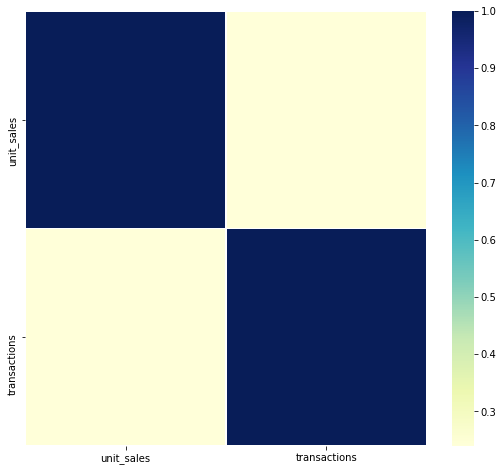

In [0]:
corrmat = train_data.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 


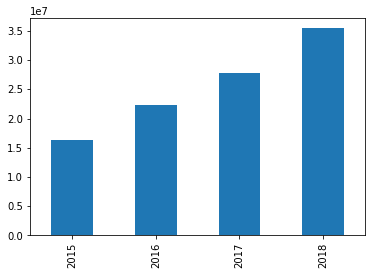

In [0]:
train_data["date"].dt.year.value_counts(sort = False).plot.bar()

There is a gradual increase in the number of observations for each year 

In [0]:
import gc

In [0]:
train_2018 = train_data[train_data["date"].dt.year == 2018]
train_2017 = train_data[train_data["date"].dt.year == 2017]
train_2016 = train_data[train_data["date"].dt.year == 2016]
train_2015 = train_data[train_data["date"].dt.year == 2015]
# del train; gc.collect() # free up some memory

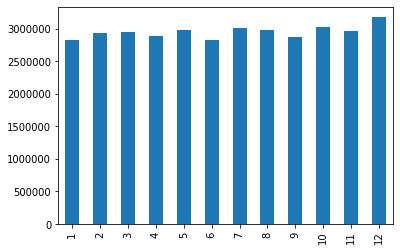

In [0]:
train_2018["date"].dt.month.value_counts(sort = False).plot.bar()

The observations are almost uniformly distributed by month.The maximum occurs in December.

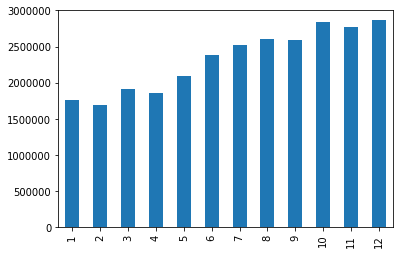

In [0]:
train_2017["date"].dt.month.value_counts(sort = False).plot.bar()

There seems to be a gradual increase by month for this year 

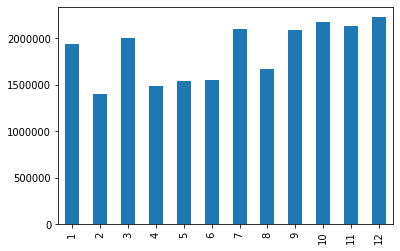

In [0]:
train_2016["date"].dt.month.value_counts(sort = False).plot.bar()

Random distribution for 2016 no specific pattern

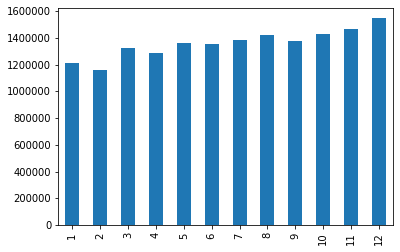

In [0]:
train_2015["date"].dt.month.value_counts(sort = False).plot.bar()

Almost uniformly distributed 

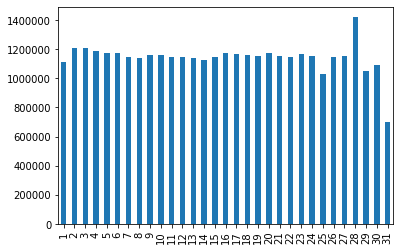

In [0]:
train_2018["date"].dt.day.value_counts(sort = False).plot.bar()

The observations are almost uniformly distributed by day

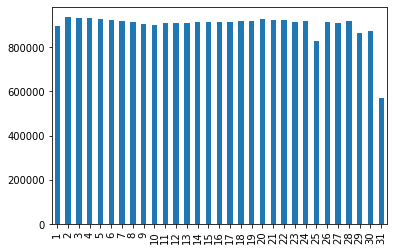

In [0]:
train_2017["date"].dt.day.value_counts(sort = False).plot.bar()

The observations are almost uniformly distributed by day

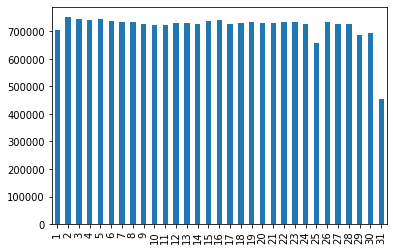

In [0]:
train_2016["date"].dt.day.value_counts(sort = False).plot.bar()

The observations are almost uniformly distributed by day

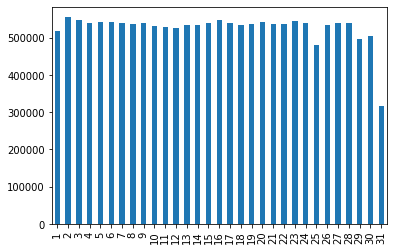

In [0]:
train_2015["date"].dt.day.value_counts(sort = False).plot.bar()

The observations are almost uniformly distributed by day

In [0]:
len(train_2018["locationId"].unique())

53

In [0]:

len(train_2017["locationId"].unique())

53

In [0]:
len(train_2016["locationId"].unique())

48

In [0]:
len(train_2015["locationId"].unique())

47

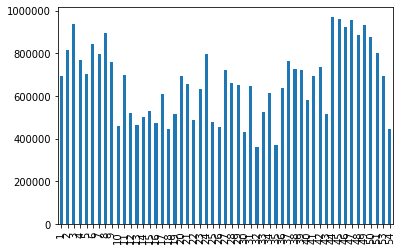

In [0]:
train_2018["locationId"].value_counts(sort = False).plot.bar()

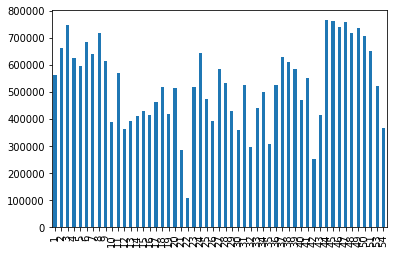

In [0]:
train_2017["locationId"].value_counts(sort = False).plot.bar()

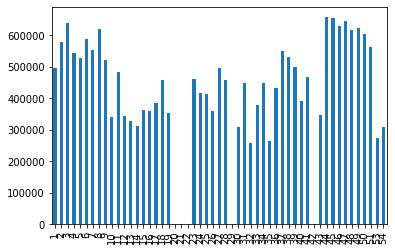

In [0]:
train_2016["locationId"].value_counts(sort = False).plot.bar()

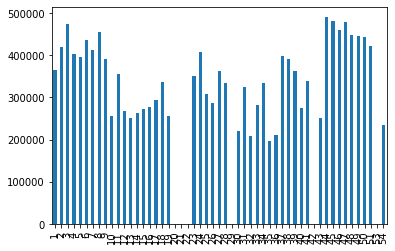

In [0]:
train_2015["locationId"].value_counts(sort = False).plot.bar()

The y-axis is the number of observations corresponding to a particular store. A store with more observations does not necessarily outperform a store with fewer observations. This is because some stores may offer a wider range of products but push less volume. This would inflate their numbers in this plot. We can interpret the y-axis as a measure of the store's variance.

In [0]:
train_2018["item_id"].unique().shape[0]

3886

There were 3886 different types of items either sold or returned during 2018.

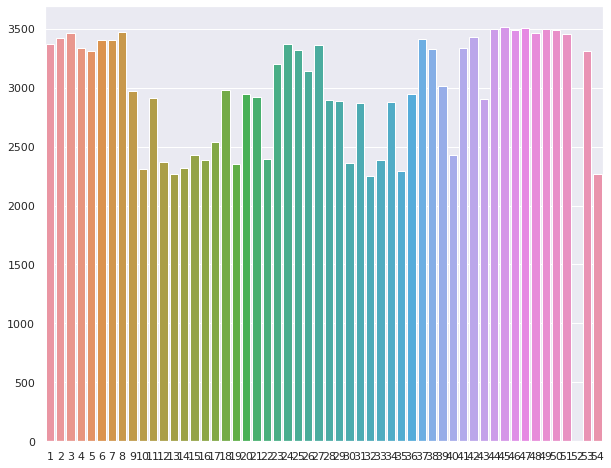

In [0]:
stores = np.arange(1, 55)
items_store = np.zeros((54, ))
for i, store in enumerate(stores) :
    items_store[i] = train_2018["item_id"][train_2018["locationId"] \
                                               == store].unique().shape[0]
sns.barplot(stores, items_store)
sns.set(rc={'figure.figsize':(10,8)})

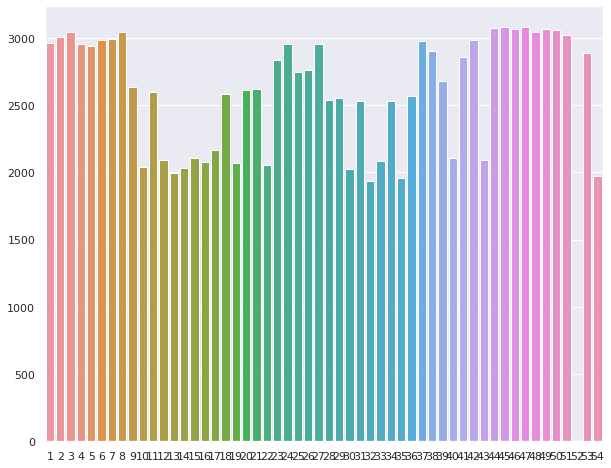

In [0]:
stores = np.arange(1, 55)
items_store = np.zeros((54, ))
for i, store in enumerate(stores) :
    items_store[i] = train_2017["item_id"][train_2017["locationId"] \
                                               == store].unique().shape[0]
sns.barplot(stores, items_store)
sns.set(rc={'figure.figsize':(10,8)})

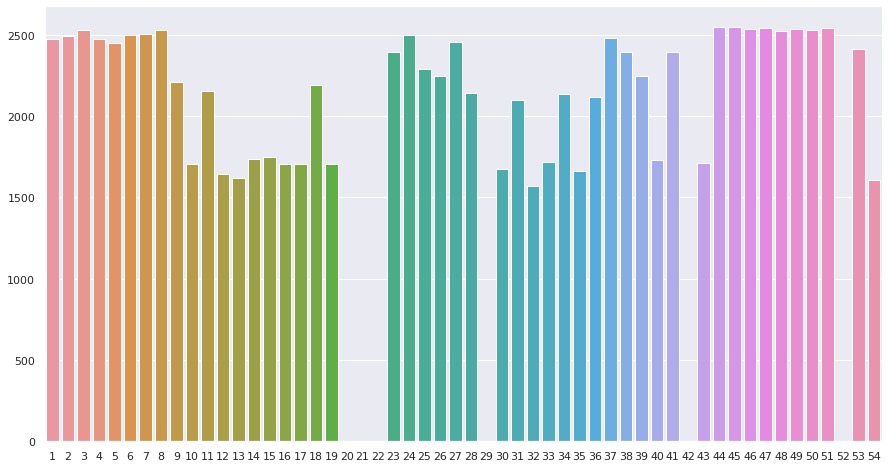

In [0]:
stores = np.arange(1, 55)
items_store = np.zeros((54, ))
for i, store in enumerate(stores) :
    items_store[i] = train_2016["item_id"][train_2016["locationId"] \
                                               == store].unique().shape[0]
sns.barplot(stores, items_store)
sns.set(rc={'figure.figsize':(10,8)})

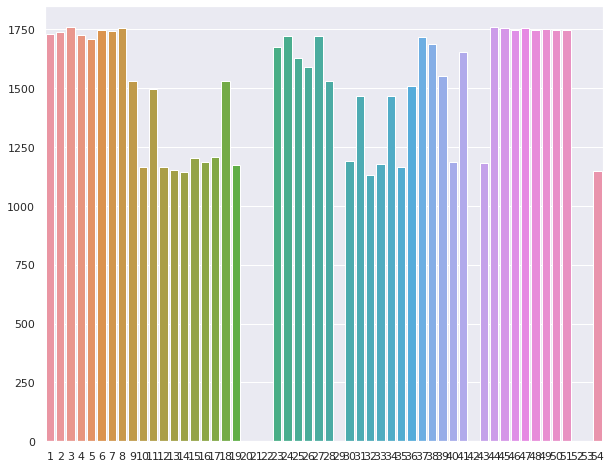

In [0]:
stores = np.arange(1, 55)
items_store = np.zeros((54, ))
for i, store in enumerate(stores) :
    items_store[i] = train_2015["item_id"][train_2015["locationId"] \
                                               == store].unique().shape[0]
sns.barplot(stores, items_store)
sns.set(rc={'figure.figsize':(15,8)})

In [0]:
train_2018["unit_sales"].describe()

count    3.542330e+07
mean     6.020286e+00
std      8.657676e+00
min     -6.363900e+01
25%      2.000000e+00
50%      4.000000e+00
75%      8.000000e+00
max      7.286100e+01
Name: unit_sales, dtype: float64

In [0]:
train_2018["onpromotion"].value_counts()

False    31898605
True      3524696
Name: onpromotion, dtype: int64

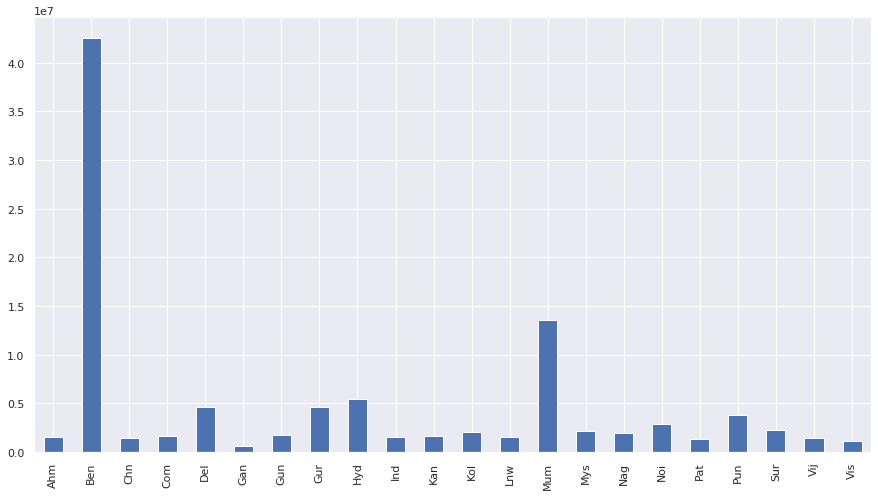

In [0]:
train_data["city"].value_counts(sort = False).plot.bar()

Bangalore has the highest number of observations followed by Mumbai

12


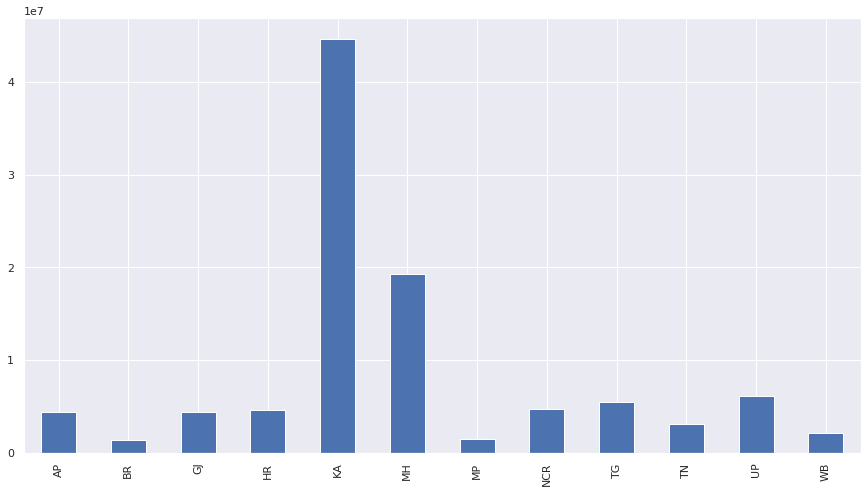

In [0]:
print(train_data["state"].unique().shape[0])
train_data["state"].value_counts(sort = False).plot.bar()

Karnataka has the highest number of observations followed by Maharashtra

5


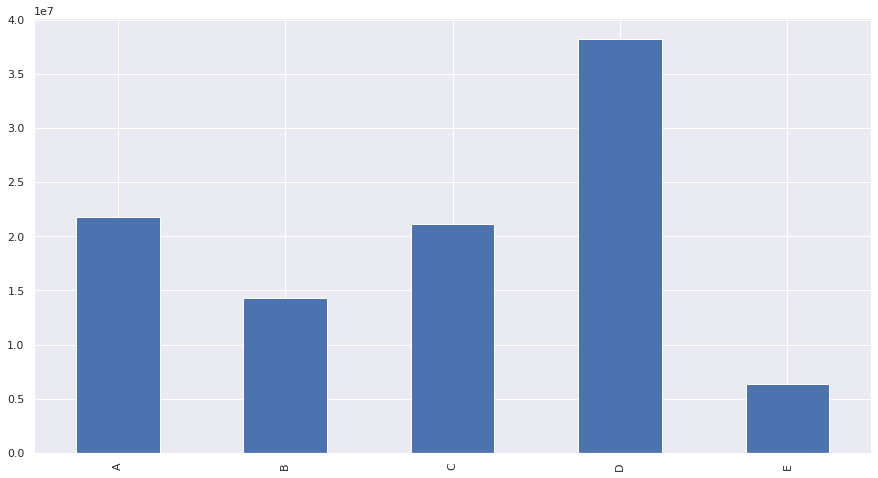

In [0]:
print(train_data["type"].unique().shape[0])
train_data["type"].value_counts(sort = False).plot.bar()

Type D has the highest number of observations 

17


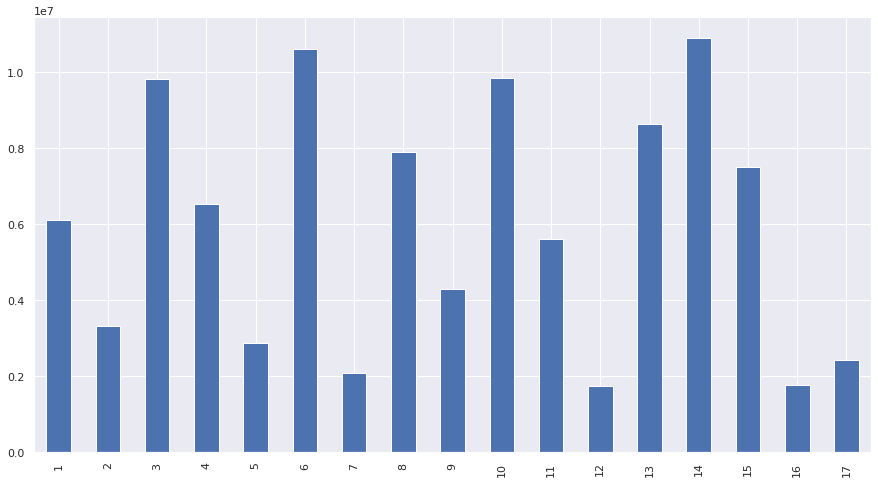

In [0]:
print(train_data["cluster"].unique().shape[0])
train_data["cluster"].value_counts(sort = False).plot.bar()

In [0]:
train_data.groupby(["type", "cluster"]).size()

type  cluster
A     5           2883299
      11          5591648
      14         10882876
      17          2437771
B     6          10602314
      10          1944380
      16          1756470
C     3           9803272
      7           2077523
      12          1753789
      15          7506055
D     1           6095231
      2           3321632
      4           6523218
      8           7885171
      9           4300055
      10          1494644
      13          8627928
E     10          6394933
dtype: int64

In [0]:
train_data.groupby(["type", "state"]).size()

type  state
A     HR        2628093
      KA       16729730
      MH        2437771
B     KA        5244933
      MH        3839983
      NCR        940828
      TG        2170274
      WB        2107146
C     AP        2621856
      BR        1353902
      GJ        2187333
      KA        3195729
      MH        4164280
      MP        1542941
      NCR       1521836
      TN        1623115
      UP        2929647
D     GJ        2254617
      HR        1960784
      KA       19526333
      MH        5803980
      NCR       2220152
      TG        3321632
      TN        1489744
      UP        1670637
E     AP        1803643
      MH        3064216
      UP        1527074
dtype: int64

30


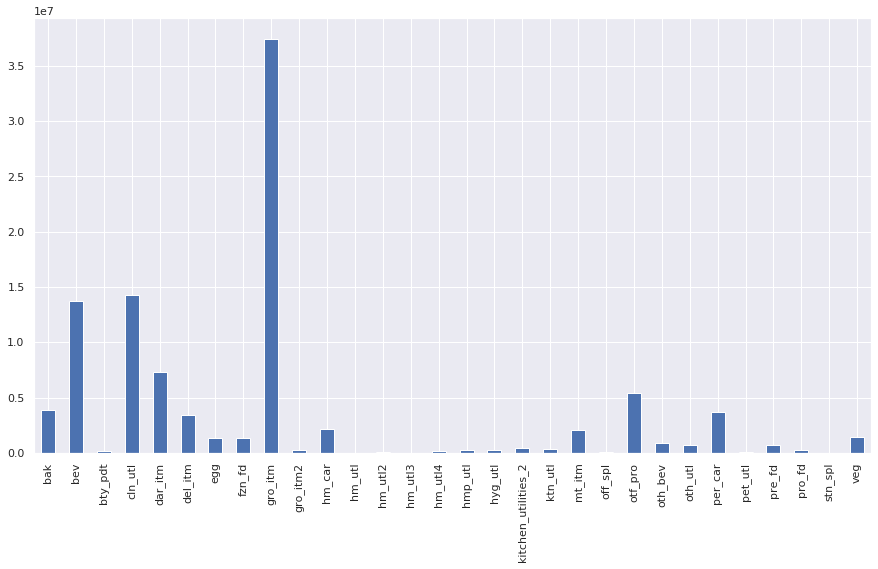

In [0]:
print(train_data["category_of_item"].unique().shape[0])
train_data["category_of_item"].value_counts(sort = False).plot.bar()

In [0]:
train_data["perishable"].value_counts()

0    76221246
1    25660963
Name: perishable, dtype: int64

### Time Series Analysis

In [0]:
train_data_time = train_data.copy()

In [0]:
train_data_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101688779 entries, 0 to 101688778
Data columns (total 5 columns):
date           datetime64[ns]
locationId     category
item_id        category
unit_sales     float32
onpromotion    category
dtypes: category(3), datetime64[ns](1), float32(1)
memory usage: 1.5 GB


In [0]:
train_data_time['date'] = train_data_time['date'].astype("object")

In [0]:
train_data_time['date'] = pd.to_datetime(train_data_time['date'])

In [0]:
train_data1=train_data_time[train_data_time['date'] >='2017-01-01']

In [0]:
print(train_data1.head())

               date locationId item_id  unit_sales onpromotion
38594264 2017-01-01         25  103665        12.0       False
38594265 2017-01-01         25  105575        23.0       False
38594266 2017-01-01         25  108634         1.0       False
38594267 2017-01-01         25  108698         6.0       False
38594268 2017-01-01         25  108786         6.0       False


In [0]:
#represent month in date field as its first day
train_data1['date'] =train_data1['date'].dt.year.astype('str') + '-' + train_data1['date'].dt.month.astype('str') + '-01'


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
train_data1['date'] = pd.to_datetime(train_data1['date'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
#groupby date and sum the sales
train_data_day = train_data1.groupby('date').unit_sales.sum().reset_index()

In [0]:
train_data_day.head()

,date,unit_sales
0,2017-01-01,14896921.0
1,2017-02-01,13742395.0
2,2017-03-01,15598608.0
3,2017-04-01,14955060.0
4,2017-05-01,17730364.0


In [0]:
#plot monthly sales
plot_data = [
    go.Scatter(
        x=train['date'],
        y=train['unit_sales'],
    )
]
plot_layout = go.Layout(
        title='Monthly Sales'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [0]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'G'

In [0]:
train_data_day['date'] = pd.to_datetime(train_data_day['date'])

In [0]:
train_data_day.isnull().sum()

date          0
unit_sales    0
dtype: int64

In [0]:
train_data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 2 columns):
date          1456 non-null datetime64[ns]
unit_sales    1456 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 22.9 KB


In [0]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(train_data_day["unit_sales"], model='additive')
fig = decomposition.plot()
plt.show()

In [0]:
train_data_day.shape

(1456, 2)

In [0]:
val_data=train_data_day.iloc[1425:,:]

In [0]:
#create a new dataframe to model the difference
train_data_day_diff = train_data_day.copy()
#add previous sales to the next row
train_data_day_diff['prev_sales'] = train_data_day['unit_sales'].shift(1)
#drop the null values and calculate the difference
train_data_day_diff = train_data_day_diff.dropna()
train_data_day_diff['diff'] = (train_data_day_diff['unit_sales'] - train_data_day_diff['prev_sales'])
train_data_day_diff.head(10)

,date,unit_sales,prev_sales,diff
1,2015-01-02,496092.418,2511.619,493580.799
2,2015-01-03,361429.231,496092.418,-134663.187
3,2015-01-04,354459.677,361429.231,-6969.554
4,2015-01-05,477350.121,354459.677,122890.444
5,2015-01-06,519695.401,477350.121,42345.280
6,2015-01-07,336122.801,519695.401,-183572.600
7,2015-01-08,318347.778,336122.801,-17775.023
8,2015-01-09,302530.809,318347.778,-15816.969
9,2015-01-10,258982.003,302530.809,-43548.806
10,2015-01-11,289737.685,258982.003,30755.682


In [0]:
train_data_day_diff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455 entries, 1 to 1455
Data columns (total 4 columns):
date          1455 non-null datetime64[ns]
unit_sales    1455 non-null float64
prev_sales    1455 non-null float64
diff          1455 non-null float64
dtypes: datetime64[ns](1), float64(3)
memory usage: 56.8 KB


In [0]:
#plot sales diff
plot_data = [
    go.Scatter(
        x=train_data_day_diff['date'],
        y=train_data_day_diff['diff'],
    )
]
plot_layout = go.Layout(
        title='Montly Sales Diff'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [0]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [0]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [0]:
train_data_day.head()

,date,unit_sales
0,2015-01-01,2511.619
1,2015-01-02,496092.418
2,2015-01-03,361429.231
3,2015-01-04,354459.677
4,2015-01-05,477350.121


In [0]:
del train_data_day_diff["unit_sales"]

In [0]:
del train_data_day_diff["prev_sales"]

In [0]:
train_data_day_diff.head()

,date,diff
1,2015-01-02,493580.799
2,2015-01-03,-134663.187
3,2015-01-04,-6969.554
4,2015-01-05,122890.444
5,2015-01-06,42345.280


In [0]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_data_day_diff["diff"],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - aic:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - aic:38791.740500679836
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - aic:38297.65710747354
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - aic:39874.06313415192
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - aic:38630.78438515857
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - aic:38350.96931399644
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - aic:38284.36798041745
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - aic:38941.151844716194
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - aic:38333.13826917586
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - aic:38761.26192563884
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - aic:38207.73344369691
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - aic:39663.1849542079
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - aic:38688.80116700148
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - aic:38358.433441528294
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - aic:38198.995670601136
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - aic:39035.6687963562
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - aic:38634.224547511374
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - aic:39815.50254379356
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - aic:39356.908470861665
ARIMA(

In [0]:
mod = sm.tsa.statespace.SARIMAX(train_data_day_diff["diff"],
                                order=(1, 0, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

In [0]:
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5209      0.093     -5.571      0.000      -0.704      -0.338
ma.L1          0.7182      0.083      8.647      0.000       0.555       0.881
ar.S.L12      -0.5976      0.027    -22.151      0.000      -0.650      -0.545
sigma2      5.965e+10    2.2e-12   2.72e+22      0.000    5.96e+10    5.96e+10


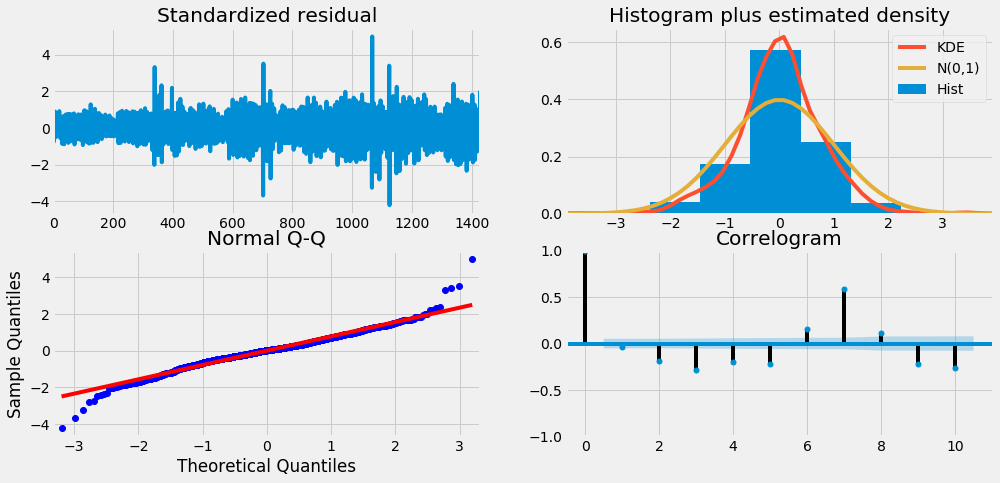

In [0]:
results.plot_diagnostics(figsize=(15, 7))
plt.show()

In [0]:
train_data_day_diff.tail()

,date,unit_sales,prev_sales,diff
1451,2018-12-27,842474.490,1032770.749,-190296.259
1452,2018-12-28,951533.714,842474.490,109059.224
1453,2018-12-29,894108.237,951533.714,-57425.477
1454,2018-12-30,1163643.038,894108.237,269534.801
1455,2018-12-31,1109012.812,1163643.038,-54630.226


In [0]:
len(val_data["date"])

31

In [0]:
#mod = mod.fit()
pred = results.get_prediction(0,dynamic=False)
pred_ci = pred.conf_int()

In [0]:
pred=pred.predicted_mean

In [0]:
date_num=(train_data_day_diff.date.apply(lambda name: name.split('-')[0].strip())).unique()

In [0]:
date_num=list(date_num)

In [0]:
date_num

['2015', '2016', '2017', '2018']

In [0]:
ax = date_num.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('unit_sales')
plt.legend()

plt.show()

In [0]:
!pip install scikit-learn

In [0]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [0]:
mean_absolute_percentage_error(train_data_day_diff["diff"], pred)  #High mape so did not run on test data

350.81976708972314